In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
dataframe = pd.read_csv(url, sep='\t')

In [3]:
dataframe.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### 1. Вывести: кол-во наблюдений в датасете

In [4]:
dataframe.shape[0]

4622

#### 2. Вывести названия столбцов

In [5]:
list(dataframe.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

#### 3. Определить самую частую позицию (item) в заказе 

In [6]:
dataframe['item_name'].mode()[0]

'Chicken Bowl'

#### 4. Построить гистрограмму частоты заказов по позициям (item)

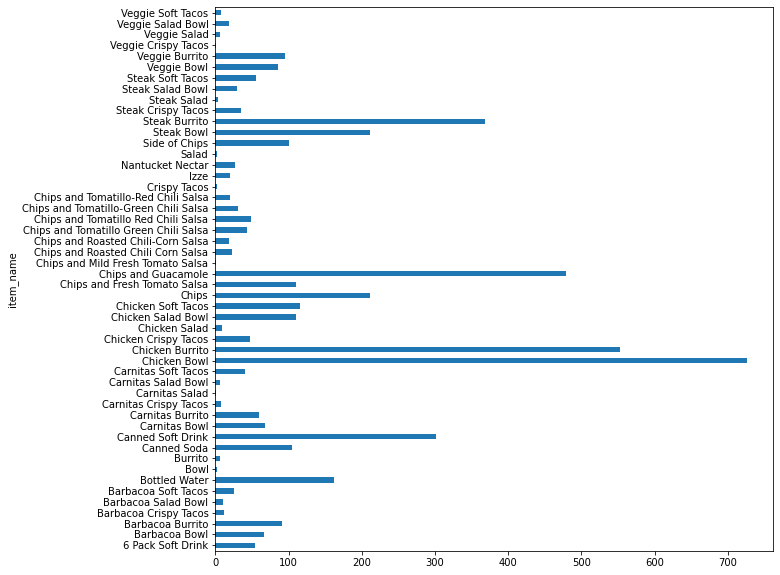

In [7]:
dataframe.groupby('item_name').size().plot(kind='barh', figsize=(10,10))
plt.show()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [8]:
dataframe['item_price'] = dataframe['item_price'].apply(lambda x: float(x[1:]))
dataframe.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

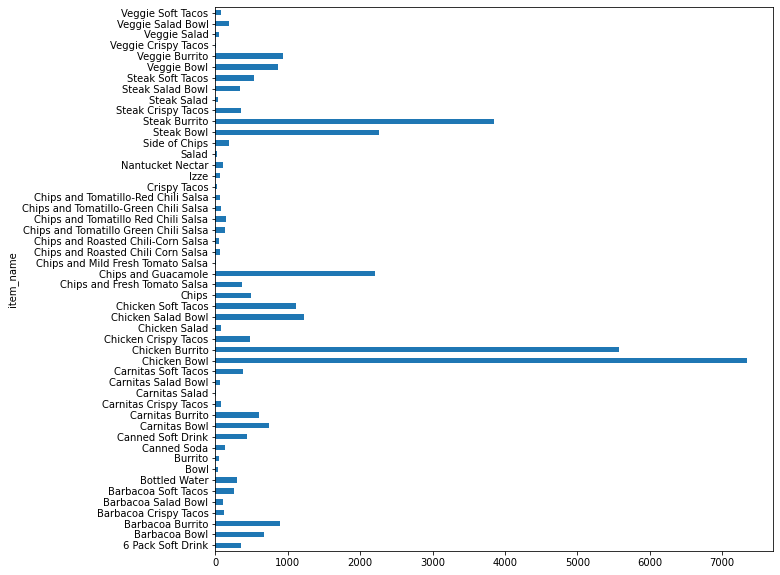

In [9]:
dataframe.groupby('item_name')['item_price'].sum().plot(kind='barh', figsize=(10,10))
plt.show()

# pd.concat([dataframe['item_name'], dataframe['item_price']], axis=1).groupby('item_name').sum().plot(kind='barh', figsize=(10,10))

# {key: (dataframe['item_price'])[value].sum() 
#     for key, value in dataframe.groupby('item_name').indices.items()}

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [10]:
print(dataframe.groupby('order_id')['item_price'].sum().mean())
print(dataframe['item_price'].sum() / dataframe.groupby('order_id').ngroups)

18.811428571428568
18.811428571428575


#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [11]:
print(dataframe.groupby('order_id').size().mean())
print(dataframe.groupby('order_id').size().min())
print(dataframe.groupby('order_id').size().max())
print(dataframe.groupby('order_id').size().median())

2.520174482006543
1
23
2.0


#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.

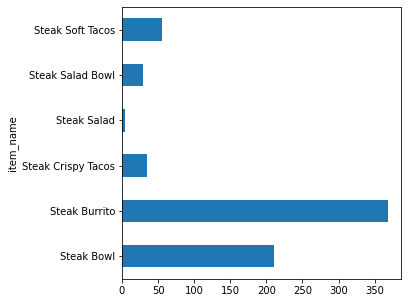

In [12]:
dataframe[dataframe['item_name'].str.contains('steak', case=False)].groupby('item_name').size().plot(kind='barh', figsize=(5,5))
plt.show()

In [13]:
flavors = {
    'Mild': '^(?=.*mild)(?!.*medium)(?!.*hot)',
    'Medium': '^(?!.*mild)(?=.*medium)(?!.*hot)',
    'Hot': '^(?!.*mild)(?!.*medium)(?=.*hot)',
    'Mild&Medium':'^(?=.*mild)(?=.*medium)(?!.*hot)',
    'Mild&Hot':'^(?=.*mild)(?!.*medium)(?=.*hot)',
    'Medium&Hot':'^(?!.*mild)(?=.*medium)(?=.*hot)',
    'Mild&Medium&Hot':'^(?=.*mild)(?=.*medium)(?=.*hot)',
}

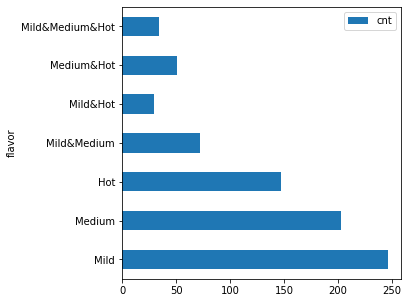

In [14]:
flavor_categories = []
for name, regex_str in flavors.items():
    flavor_categories.append([name, dataframe['choice_description'].str.contains(regex_str, case=False, regex=True).sum()])
flavor_categories = pd.DataFrame(data=flavor_categories, columns=['flavor', 'cnt'])
flavor_categories.plot(kind='barh', figsize=(5,5), x='flavor')
plt.show()

#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [15]:
# не знаю открытого апи для получения текущего курса валют, поэтому хардкод (14.11.2021 01:38)
usd_to_rub = 72.9

dataframe['item_price_rub'] = dataframe['item_price'].apply(lambda x: x * usd_to_rub)
dataframe.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rub
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,174.231
1,1,1,Izze,[Clementine],3.39,247.131
2,1,1,Nantucket Nectar,[Apple],3.39,247.131
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,174.231
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1237.842


#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

In [16]:
dataframe['items'] = dataframe.groupby('order_id')['item_name'].transform(lambda x: ', '.join(x))
dataframe.groupby('items').agg({'order_id': lambda x: list(x)})

,order_id
items,
"6 Pack Soft Drink, Carnitas Bowl","[566, 566, 774, 774]"
"6 Pack Soft Drink, Chicken Bowl","[298, 298]"
"6 Pack Soft Drink, Chicken Burrito, Chicken Soft Tacos, Chicken Burrito, Chicken Soft Tacos, Chicken Crispy Tacos","[1454, 1454, 1454, 1454, 1454, 1454]"
"6 Pack Soft Drink, Chicken Burrito, Chips and Guacamole","[1800, 1800, 1800]"
"6 Pack Soft Drink, Chicken Salad Bowl, Chips and Guacamole","[798, 798, 798, 1517, 1517, 1517]"
...,...
"Veggie Salad Bowl, Chips and Guacamole","[536, 536, 1677, 1677]"
"Veggie Salad Bowl, Steak Burrito","[1700, 1700]"
"Veggie Salad, Steak Burrito, Bottled Water","[1192, 1192, 1192]"


In [17]:
dataframe['flavor'] = None
steaks = dataframe[dataframe['item_name'].str.contains('steak', case=False)]

for name, regex_str in flavors.items():
    dataframe.loc[dataframe['choice_description'].str.contains(regex_str, case=False, regex=True) == True, 'flavor'] = name
dataframe.groupby('flavor').agg({'order_id': lambda x: list(x)})

,order_id
flavor,
Hot,"[2, 17, 21, 21, 29, 29, 30, 30, 32, 38, 38, 67..."
Medium,"[8, 13, 14, 15, 23, 24, 31, 45, 45, 47, 50, 55..."
Medium&Hot,"[12, 51, 51, 52, 72, 73, 89, 141, 186, 186, 18..."
Mild,"[3, 9, 25, 46, 73, 80, 84, 121, 131, 140, 145,..."
Mild&Hot,"[76, 409, 436, 472, 492, 531, 539, 579, 624, 6..."
Mild&Medium,"[16, 74, 119, 173, 178, 189, 276, 293, 311, 32..."
Mild&Medium&Hot,"[11, 22, 108, 321, 371, 447, 623, 663, 663, 67..."


#### 12. Определить цену по каждой позиции в отдельности. 

In [18]:
dataframe['one_item_price'] = dataframe['item_price'] / dataframe['quantity']
dataframe.groupby('item_name').agg({'one_item_price': [pd.NamedAgg('prices', lambda x: set(x)), 'mean']})

one_item_price  \
                                                                                  prices   
item_name                                                                                  
6 Pack Soft Drink                                                                 {6.49}   
Barbacoa Bowl                                    {8.99, 9.25, 8.69, 11.75, 11.48, 11.49}   
Barbacoa Burrito                                 {8.99, 9.25, 8.69, 11.75, 11.08, 11.48}   
Barbacoa Crispy Tacos                                         {11.48, 9.25, 8.99, 11.75}   
Barbacoa Salad Bowl                                                        {9.39, 11.89}   
Barbacoa Soft Tacos                                           {8.99, 9.25, 11.75, 11.48}   
Bottled Water                                                                {1.09, 1.5}   
Bowl                                                           {7.4, 7.3999999999999995}   
Burrito                                                                            {7.4}   
Canned Soda                                                                       {1.09}   
Canned Soft Drink                                                                 {1.25}   
Carnitas Bowl                                          {8.99, 9.25, 11.75, 11.48, 11.08}   
Carnitas Burrito                                 {8.99, 9.25, 8.69, 11.75, 11.48, 11.08}   
Carnitas Crispy Tacos                                                {8.99, 9.25, 11.75}   
Carnitas Salad                                                                    {8.99}   
Carnitas Salad Bowl                                                        {9.39, 11.89}   
Carnitas Soft Tacos                                                  {8.99, 9.25, 11.75}   
Chicken Bowl                           {8.49, 8.75, 10.98, 11.25, 10.979999999999999,...   
Chicken Burrito                                  {8.49, 8.75, 10.98, 11.25, 10.58, 8.19}   
Chicken Crispy Tacos                                          {8.75, 8.49, 10.98, 11.25}   
Chicken Salad                                                        {8.49, 8.19, 10.98}   
Chicken Salad Bowl                                                         {8.75, 11.25}   
Chicken Soft Tacos                                            {8.75, 8.49, 10.98, 11.25}   
Chips                                                                       {1.99, 2.15}   
Chips and Fresh Tomato Salsa                                          {2.39, 2.95, 2.29}   
Chips and Guacamole                                        {3.89, 4.25, 3.99, 4.45, 4.0}   
Chips and Mild Fresh Tomato Salsa                                                  {3.0}   
Chips and Roasted Chili Corn Salsa                                                {2.95}   
Chips and Roasted Chili-Corn Salsa                                                {2.39}   
Chips and Tomatillo Green Chili Salsa                                             {2.95}   
Chips and Tomatillo Red Chili Salsa                                               {2.95}   
Chips and Tomatillo-Green Chili Salsa                                             {2.39}   
Chips and Tomatillo-Red Chili Salsa                                               {2.39}   
Crispy Tacos                                                                       {7.4}   
Izze                                                                              {3.39}   
Nantucket Nectar                                                                  {3.39}   
Salad                                                                              {7.4}   
Side of Chips                                                 {1.69, 1.6900000000000002}   
Steak Bowl                                       {8.99, 9.25, 8.69, 11.48, 11.75, 11.08}   
Steak Burrito                                    {8.99, 9.25, 8.69, 11.75, 11.48, 11.08}   
Steak Crispy Tacos                                             {8.99, 9.25, 8.69, 11.75}   
Steak Salad               

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### [Approximation and Projection for Dimension Reduction](https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.